**Apprentissage non-supervisé** : la machine analyse *la structure* des données **X** pour apprendre **elle-même** à réaliser certaines tâches.
Par exemple la machine peut apprendre à **classer** les données selon leur **ressemblance**, c'est ce qu'on appelle le **clustering** ou classification non-supervisée.

**La réduction de la dimentionnalité** : en étudiant la structure de nos données, la machine apprend à la **simplifier** tout en conservant les **principales** informations. Pour réaliser cette opération, la machine apprend en fait à **projeter** du mieux possible nos données dans des **espaces** de plus **petite dimension**. L'**Analyse par Composante Principale ou PCA** permet cela.

## K-Means CLUSTERING

Le **clustering** : le principe de laisser la machine à apprendre de classer les données selon leur **ressemblance**.

L'algorithme le plus utilisé pour cela est le **K-M Clustering**!!
Cet algorithme fonctionne en 2 étapes :

1. on affecte les points du Dataset au centroid le **plus proche**
2. on calcule la moyenne de chaque cluster et on y décplace le centroid.

On peut faire face à un mauvais clustering. Pour y rémédier, on exécute K-Mean avec **différentes positions de départ**.
La solution retenue est celle qui **minimise** la somme des distances entre les **points(x)** d'un cluster et son centre(u)

**En resumé**:

**K-Mean** cherche la position des centres qui **minimise** la distance entre les **points** d'un cluster(*x*) et le centre(*u*) de ce dernier. K-Mean minimise la variance des clusters!!!

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

## CLUSTERING

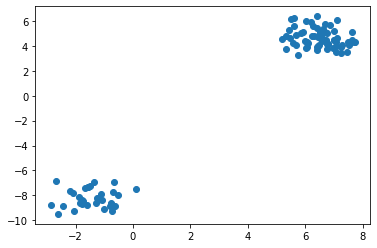

In [82]:
# Génération de données

X, y = make_blobs(n_samples = 100, centers = 3, cluster_std = 0.7)
plt.scatter(X[:, 0], X[:, 1])

In [83]:
from sklearn.cluster import KMeans

-69.08666680329654

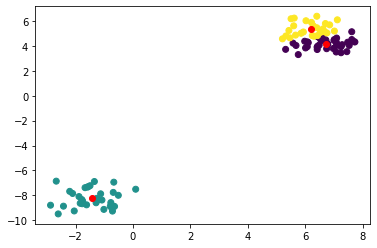

In [84]:
model = KMeans(n_clusters = 3)
model.fit(X)
model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = model.predict(X))
model.cluster_centers_
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c = 'r') #on obtient la position finale de nos 3 
#centroid

model.inertia_ #on obtient la somme des distances entre les poinst d'un cluster et les centroid.
model.score(X)

Pour trouver le bon nombre de clusters, il existe la méthode **Elbow Method** qui permet de détecter une zone de **coude** dans la minimisation du Coût (**inertia_**).

In [85]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters = k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Cout du modele (Inertia)')

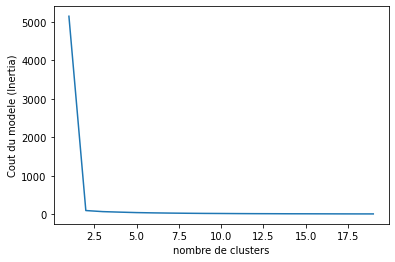

In [86]:
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)') #Ici la zone de coude pour le nombre de cluster est de 3.

## Isolation Forest : Anomaly Detection

La détection d'anomalie : consiste à détecter dans notre dataset les échantillons dont les caractéristiques **X** sont très éloignées de celles des autres échantillons.

Isolation Forest : on effectue une série de **splits** aléatoires, et on **compte** le nombre de splits qu'il faut effectuer pour pouvoir **isoler** nos échantillons.

Faible nombre de splits = forte probabilité d'anomalie.

Dans Sklearn, il suffir de définir le **pourcentage** de données que vous désirez (taux de **contamination**).

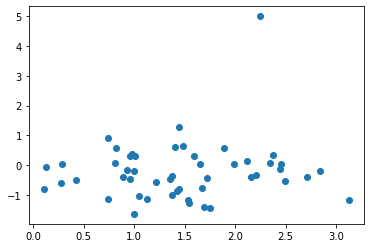

In [87]:
X, y = make_blobs(n_samples = 50, centers = 1, cluster_std = 0.7)
X[-1,:] = np.array([2.25, 5])
plt.scatter(X[:, 0], X[:, 1])

In [88]:
from sklearn.ensemble import IsolationForest

In [89]:
model = IsolationForest(contamination = 0.01) #On précise juste le taux de contamination
model.fit(X)

IsolationForest(contamination=0.01)

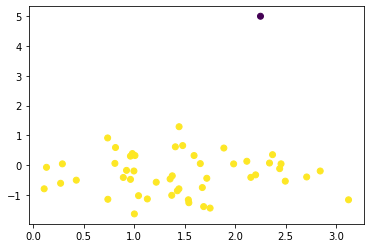

In [90]:
plt.scatter(X[:, 0], X[:, 1], c = model.predict(X))

Cette méthode d'IsolationForest permet de **détecter de fraude bancaires**, des **défaillances techniques dans une usine**, un
**comportement anormale sur une caméra de surveillance** ou tout simplement les **outliers** qui pourraient avoir dans un dataset que l'on désire nettoyer.

# Application Décontamination Digits

In [91]:
from sklearn.datasets import load_digits

In [92]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

print(X.shape)

(1797, 64)


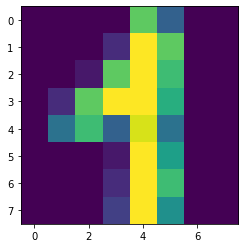

In [93]:
plt.imshow(images[42])

In [94]:
model = IsolationForest(random_state = 0, contamination = 0.02) #il faut fixer un taux de contamination assez faible par 
#exemple 1%, 2% au grand max 5%

In [95]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [96]:
model.predict(X) #On obtient un tableau ne contenant uniquement que des 1 et des -1. Les 1 représentent les données sans 
#anomalies et les -1 représentent les données avec anomalies.

array([1, 1, 1, ..., 1, 1, 1])

In [97]:
outliers = model.predict(X) == -1
outliers

array([False, False, False, ..., False, False, False])

In [98]:
images[outliers][0]

array([[ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16., 16., 12.,  0.],
       [ 0.,  0.,  0.,  8., 14., 16., 12.,  0.],
       [ 0.,  0.,  0.,  5., 10., 16.,  6.,  0.],
       [ 0.,  1.,  7., 11., 16., 13.,  0.,  0.],
       [ 0.,  9., 16., 16., 14.,  1.,  0.,  0.],
       [ 0.,  3.,  8., 14., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 16., 12.,  0.]])

Text(0.5, 1.0, '2')

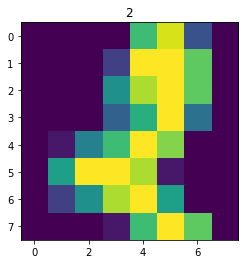

In [99]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

**Novelty Detection** : détecte les anomalies dans les **données futures**. (*Local Outlier Factor*); Ici on demande à la machine d'analyser nos données **X** non pas de trouver des anomalies dans les **Train_set** mais pour trouver des anomalies dans le **Test_set** c.à.d dans les données du futur.

**Outlier Detection** : détecte les anomalies dans le **Train_set**. (*Isolation Forest*)


## PCA : Réduction de la dimensionnalité

Le but de cette méthode est :

- **Accélérer l'apprentissage** de la machine
- Lutter contre le **fleau de la dimension** (risque d'overfitting lié au surplus de dimensions)

**PCA** : le principe est de projeter nos données sur des axes appelés **composantes principales** en cherchant à minimiser la distance entre nos points et leur projection. De cette manière, on réduit la dimension de notre dataset, tout en **préservant au maximum** la variance de nos données.

Du point de vu mathématiques, pour trouver **les axes** de projection :

1. On calcule la **matrice de covariance** des données
2. On détermine les **vecteurs propres** de cette matrice(c.à.d les vecteurs qui facilitent l'interprétation de cette matrice): ce sont les **Composantes Principales**
3. (On **projette** les données sur ces **axes**)

**Compression de données** pour accélérer l'apprentissage de la machine sur les tâches de classification ou de régression.
Pour ça, il faut choisir le nombre des composantes de tel sorte à préserver entre 95 et 99% de la variance de nos données.
En effet plus on réduit la dimension d'un dataset, plus on perd en qualité c.à.d en variance. Donc notre but est de réduire au maximum la dimension d'un dataset, tout en minimisant la perte de qualité. C'est pourquoi il est conseillé de choisir le nombre de composantes de tel sorte à garder 95 et 99% de la variance originelle.

In [100]:
from sklearn.decomposition import PCA

In [101]:
X.shape

(1797, 64)

In [102]:
model = PCA(n_components = 2)
X_reduced = model.fit_transform(X)

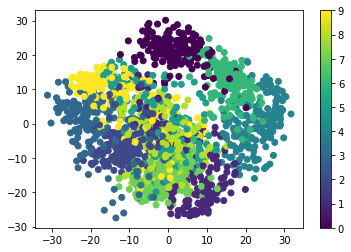

In [103]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y)
plt.colorbar()

#On voit ici comment est organisé dans une espace 2D les échantillons du Dataset.

In [104]:
model.components_
#On obtient les axes du graphiques

array([[ 0.00000000e+00, -1.73094635e-02, -2.23428809e-01,
        -1.35913324e-01, -3.30323773e-02, -9.66341142e-02,
        -8.32943711e-03,  2.26900135e-03, -3.20516554e-04,
        -1.19308907e-01, -2.44451667e-01,  1.48512711e-01,
        -4.67320059e-02, -2.17740760e-01, -1.48136623e-02,
         4.47779596e-03, -4.94137793e-05, -7.95419475e-02,
         8.33951676e-02,  2.15915334e-01, -1.72126807e-01,
        -1.63712064e-01,  2.86444656e-02,  4.23251882e-03,
         9.85487977e-05,  6.42319085e-02,  2.54093321e-01,
        -3.56771045e-02, -2.09462540e-01, -4.31311138e-02,
         5.13118682e-02,  2.13422755e-04,  0.00000000e+00,
         1.59950891e-01,  3.68690769e-01,  1.64406831e-01,
         8.52008192e-02,  3.72982702e-02,  2.15866702e-02,
         0.00000000e+00,  1.28865603e-03,  1.06945304e-01,
         3.03067487e-01,  2.47813035e-01,  2.09637332e-01,
         1.22325282e-02, -3.69458886e-02,  1.61484940e-03,
         6.93023483e-04, -8.35143005e-03, -5.58598586e-0

In [105]:
model.components_.shape

#on voit que chaque composante contient 64 valeurs. Si nous avons 64 valeurs, c'est parce que chaque composante est combinaisons
#linéaires de 64 variables de notre dataset

(2, 64)

In [106]:
model = PCA(n_components = 64)
X_reduced = model.fit_transform(X)

In [107]:
model.explained_variance_ratio_ 

#on obtient le pourcentage de variance préserver par chacune de nos composantes

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [108]:
#on calcule la somme cumulée de tous ces pourcentage de variance
np.cumsum(model.explained_variance_ratio_ )

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

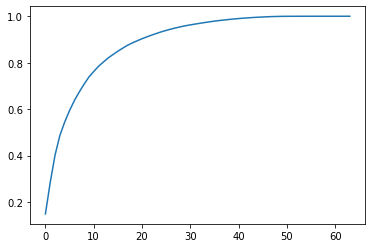

In [109]:
plt.plot(np.cumsum(model.explained_variance_ratio_ ))

In [110]:
np.argmax(np.cumsum(model.explained_variance_ratio_ ) > 0.99) 

#On cherche l'endroit où tout ça est supérieur à 99%, c.à.d que c'est à partir de la 40eme composante principale  que 
#l'on atteint 99 % de la variance de notre modèle.

40

In [111]:
model = PCA(n_components = 40)
X_reduced = model.fit_transform(X)

#Nous fixons une composante principale = 40 et on est sûre d'avoir réduit notre dimension à la meilleure valeur, tout en 
#gardant 99% de l'information de notre modèle

In [112]:
model.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 , 0.00428888,
       0.00373606, 0.00353274, 0.00336684, 0.0032803 , 0.00308321,
       0.00293779, 0.00256589, 0.00227742, 0.00222278, 0.0021143 ])

In [115]:
X_recovered = model.inverse_transform(X_reduced)

#Pour voir à quoi ressemblent les images une fois qu'elles ont été compressées, il faut commencer par les décompresser pour 
#qu'elles aient à nouveau 64 pixels, on utilise la méthode inverse_transform().
#Attention en faisant ceci, nos données ne retrouvent pas la position qu'elles avaient à l'origine, à la place, on repositionne
#simplement les axes c.à.d les composantes principales là où elles ont été calculées dans notre dataset

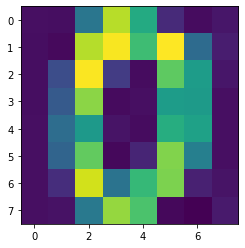

In [116]:
plt.imshow(X_recovered[0].reshape((8, 8)))

In [117]:
model = PCA(n_components = 0.95) #on peut également spécifier le pourcentage de variance que l'on désire avoir!!!!
X_reduced = model.fit_transform(X)

In [118]:
model.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [119]:
X_recovered = model.inverse_transform(X_reduced)

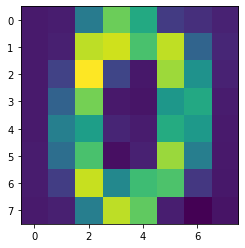

In [120]:
plt.imshow(X_recovered[0].reshape((8, 8)))

In [122]:
#Si on veut connaître le nombre de composantes utilisées dans notre modèle :

model.n_components_

#On voit qu'il y a 29 composantes nécessaires pour atteindre 95% de la variance.

29

## Quelques points importants :

- Il faut **Standardiser** les données avant d'utiliser *PCA* (**StandardScaler**) : la raison est que les axes de l'ACP partent tous de l'origine de nos données, donc il est très important que les données soient centrées et que les données aient une variance égale à 1. ce qui va beaucoup faciliter la projection de nos données dans ces axes!!!!  

- **PCA** est normalement conçu pour traiter les **variables continues**

- **PCA** ,'est pas efficace sur les datasets **non-linéaires**